In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
%env ECCODES_DEFINITION_PATH=C:/Users/hsven/Miniconda3/envs/timeseries/Library/share/eccodes/definitions
import xarray as xr
from era5 import utils
import plotly.express as px

env: ECCODES_DEFINITION_PATH=C:/Users/hsven/Miniconda3/envs/timeseries/Library/share/eccodes/definitions


In [2]:
ds_ssrd=xr.open_mfdataset("era5/data2/era5data_lat=63.5_lon=8.0_year=*.grib",engine="cfgrib",
                  backend_kwargs={'filter_by_keys': {'shortName': 'ssrd'}})
ds_fdir=xr.open_mfdataset("era5/data2/era5data_lat=63.5_lon=8.0_year=*.grib",engine="cfgrib",
                  backend_kwargs={'filter_by_keys': {'shortName': 'fdir'}})

In [144]:
lat = 62.3
lon = 8.1
data_lat,data_lon = utils.find_nearest_datapoint(lat,lon,ds_ssrd)
da_ssrd=ds_ssrd.sel(latitude=data_lat,longitude=data_lon).ssrd
da_fdir=ds_fdir.sel(latitude=data_lat,longitude=data_lon).fdir

In [146]:
df_rad = pd.DataFrame()
df_rad["fdir"] = utils.dataarray_to_dataframe(da_fdir)
df_rad["ssdr"] = utils.dataarray_to_dataframe(da_ssrd)
df_rad["diffuse"] = df_rad["ssdr"]-df_rad["fdir"]

In [170]:
albedo = 0.2
eta_el = 1
slope = 30
df_solarpower = utils.compute_solar_power(df_rad,lat=lat,lon=lon,
    panel_slope=slope*np.pi/180,panel_azimuth=np.pi,albedo=albedo,eta_rad_to_el=eta_el,tracking="2-axis")

In [171]:
df_solarpower2 = utils.compute_solar_power(df_rad,lat=lat,lon=lon,
    panel_slope=slope*np.pi/180,panel_azimuth=np.pi,albedo=albedo,eta_rad_to_el=eta_el,tracking=None)
df_solarpower3 = utils.compute_solar_power(df_rad,lat=lat,lon=lon,
    panel_slope=slope*np.pi/180,panel_azimuth=np.pi,albedo=albedo,eta_rad_to_el=eta_el,tracking="azimuth")

In [173]:
df_sol_compare = pd.concat({"2-axis":df_solarpower,"azimuth":df_solarpower3,"fixed":df_solarpower2},axis=1)

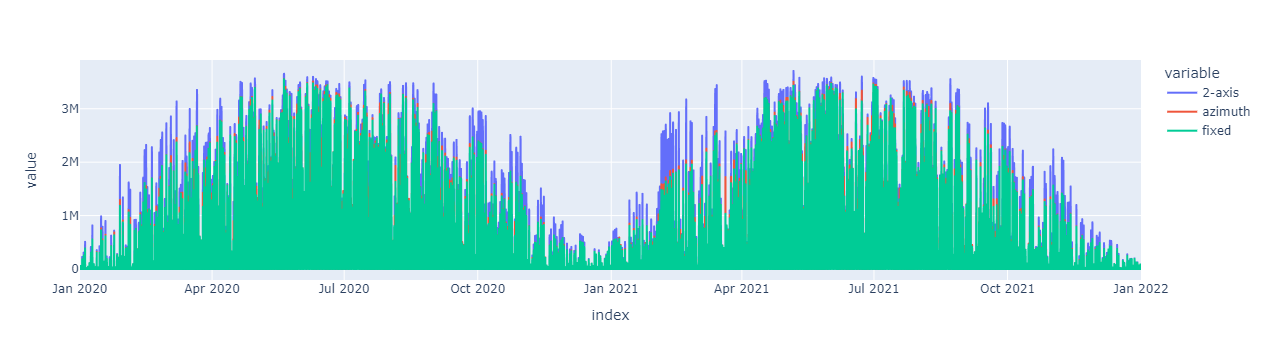

In [174]:
#px.line(pd.concat([df_rad,df_solarpower,df_solarpower2],axis=1))
px.line(df_sol_compare)

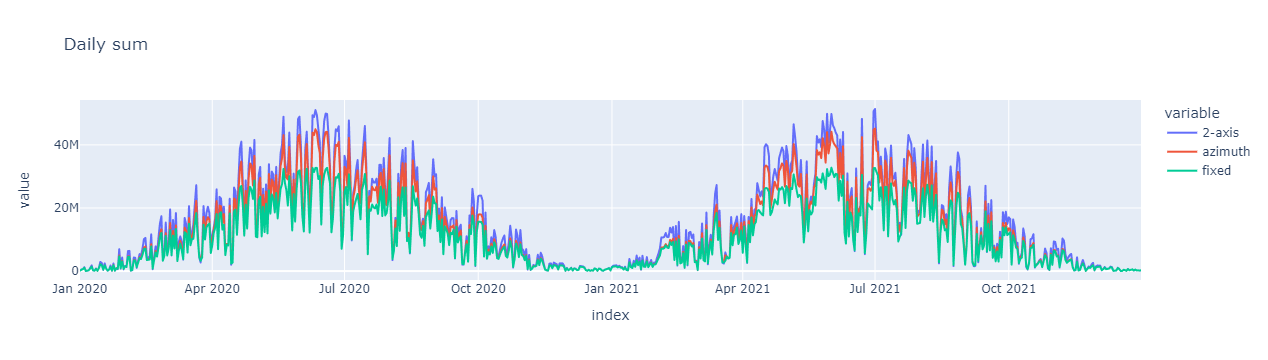

In [175]:
px.line(df_sol_compare.resample("24h").sum(),title="Daily sum")

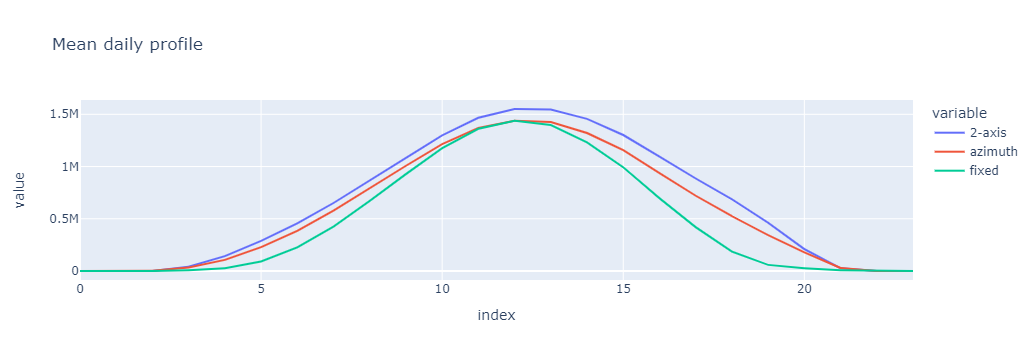

In [176]:
px.line(df_sol_compare.groupby(df_sol_compare.index.hour).mean(),title="Mean daily profile")

In [21]:
ds_u100=xr.open_mfdataset("era5/data_europe/era5data_month=2021-1*.grib",engine="cfgrib",backend_kwargs={'filter_by_keys': {'shortName': '100u'}})
#ssrd, fdir, tp
#u100,v100,u10,v10,sp,t2m

In [22]:
data_lat, data_lon = utils.find_nearest_datapoint(60, 12, ds_u100)
da_u100 = ds_u100.sel(latitude=data_lat, longitude=data_lon).u100

In [29]:
da_u100.to_pandas()

time
2021-01-01 00:00:00   -1.132477
2021-01-01 01:00:00   -1.546799
2021-01-01 02:00:00   -2.204437
2021-01-01 03:00:00   -2.605759
2021-01-01 04:00:00   -2.984756
                         ...   
2021-10-31 19:00:00    0.085358
2021-10-31 20:00:00   -1.606369
2021-10-31 21:00:00   -2.993225
2021-10-31 22:00:00   -4.640427
2021-10-31 23:00:00   -5.468323
Length: 1488, dtype: float32

In [31]:
pd.DataFrame(da_u100.values,index=da_u100.time.values).stack()

2021-01-01 00:00:00  0   -1.132477
2021-01-01 01:00:00  0   -1.546799
2021-01-01 02:00:00  0   -2.204437
2021-01-01 03:00:00  0   -2.605759
2021-01-01 04:00:00  0   -2.984756
                            ...   
2021-10-31 19:00:00  0    0.085358
2021-10-31 20:00:00  0   -1.606369
2021-10-31 21:00:00  0   -2.993225
2021-10-31 22:00:00  0   -4.640427
2021-10-31 23:00:00  0   -5.468323
Length: 1488, dtype: float32

In [15]:
ds_u100.

AttributeError: 'ValuesView' object has no attribute 'size'